# Drveta odlucivanja

## Importovanje potrebnih paketa

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

## Priprema podataka

In [3]:
df = pd.read_csv('Data/iris.csv')

feature_names = df.columns[:4].tolist()
target_name = df.columns[4]

X = df[feature_names]
y = df[target_name]

class_names = np.unique(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(100, 4) (50, 4)
(100,) (50,)


## Treniranje i evaluacija modela

In [4]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

print(classification_report(y_test, model.predict(X_test)))
print(confusion_matrix(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
  Versicolor       0.93      0.93      0.93        15
   Virginica       0.94      0.94      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50

[[19  0  0]
 [ 0 14  1]
 [ 0  1 15]]


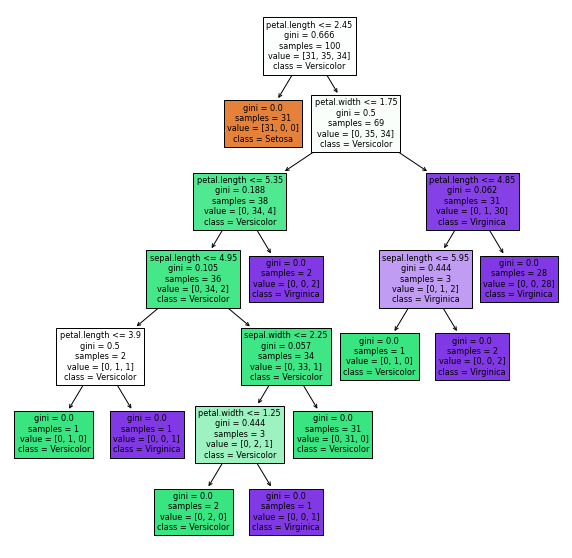

In [5]:
def my_plot_tree(tree):
    plt.figure(figsize=(10, 10))
    _ = plot_tree(tree, feature_names=feature_names, class_names=class_names, filled=True)
    
my_plot_tree(model)

Ovaj model je previse kompleksan i treba pronaci model koji ce na jednostavniji nacin opisivati podatke

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
  Versicolor       0.94      1.00      0.97        15
   Virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
[[31  0  0]
 [ 0 34  1]
 [ 0  2 32]]


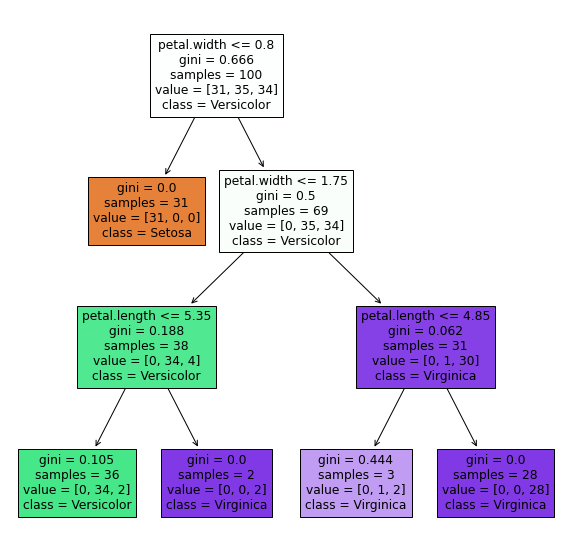

In [7]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 5]
}

clf = GridSearchCV(DecisionTreeClassifier(), param_grid=params)

clf.fit(X_train, y_train)
print(clf.best_params_)
print(classification_report(y_test, clf.predict(X_test)))
print(confusion_matrix(y_test, clf.predict(X_test)))
print(confusion_matrix(y_train, clf.predict(X_train)))

my_plot_tree(clf.best_estimator_)

# K-Najblizih Suseda (KNN)

## Importovanje potrebnih paketa

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Priprema podataka

In [20]:
df = pd.read_csv('Data/imodelaris.csv')

feature_names = df.columns[:4].tolist()
target_name = df.columns[4]

X = df[feature_names]
y = df[target_name]

X = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=feature_names)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(100, 4) (50, 4)
(100,) (50,)


## Treniranje i evaluacija modela

In [28]:
params = {
    'n_neighbors': range(3, 10),
    'p': [1, 2],
    'weights': ['uniform', 'distance']
}

clf = GridSearchCV(KNeighborsClassifier(), param_grid=params, cv=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Matrica konfuzije\n', confusion_matrix(y_test, y_pred))
print('Tacnost:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Matrica konfuzije
 [[17  0  0]
 [ 0 15  1]
 [ 0  3 14]]
Tacnost: 0.92
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        17
  Versicolor       0.83      0.94      0.88        16
   Virginica       0.93      0.82      0.87        17

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50



In [38]:
distance, indices = clf.best_estimator_.kneighbors(X_test)

for i in range(len(X_test)):
    print(X_test.iloc[i])
    print(y_test.iloc[i], y_pred[i])
    
    print('Susedi:')
    for j in range(len(indices[0])):
        print(X_train.iloc[indices[i][j]])
        print(y_train.iloc[indices[i][j]])
        print(distance[i][j])

sepal.length    0.194444
sepal.width     0.000000
petal.length    0.423729
petal.width     0.375000
Name: 60, dtype: float64
Versicolor Versicolor
Susedi:
sepal.length    0.194444
sepal.width     0.125000
petal.length    0.389831
petal.width     0.375000
Name: 93, dtype: float64
Versicolor
0.12951484504727045
sepal.length    0.166667
sepal.width     0.166667
petal.length    0.389831
petal.width     0.375000
Name: 57, dtype: float64
Versicolor
0.17233246300006236
sepal.length    0.222222
sepal.width     0.208333
petal.length    0.338983
petal.width     0.416667
Name: 98, dtype: float64
Versicolor
0.2304177469831178
sepal.length    0.333333
sepal.width     0.125000
petal.length    0.508475
petal.width     0.500000
Name: 53, dtype: float64
Versicolor
0.24025396511692734
sepal.length    0.333333
sepal.width     0.208333
petal.length    0.508475
petal.width     0.500000
Name: 89, dtype: float64
Versicolor
0.2924033952131601
sepal.length    0.388889
sepal.width     0.250000
petal.length    0

Name: 53, dtype: float64
Versicolor
0.19144512155680882
sepal.length    0.416667
sepal.width     0.250000
petal.length    0.508475
petal.width     0.458333
Name: 92, dtype: float64
Versicolor
0.19444444444444448
sepal.length    0.388889
sepal.width     0.250000
petal.length    0.423729
petal.width     0.375000
Name: 79, dtype: float64
Versicolor
0.20470482778830074
sepal.length    0.416667
sepal.width     0.291667
petal.length    0.525424
petal.width     0.375000
Name: 67, dtype: float64
Versicolor
0.21627868897043198
sepal.length    0.333333
sepal.width     0.208333
petal.length    0.508475
petal.width     0.500000
Name: 89, dtype: float64
Versicolor
0.22481130633664795
sepal.length    0.305556
sepal.width     0.791667
petal.length    0.050847
petal.width     0.125000
Name: 16, dtype: float64
Setosa Setosa
Susedi:
sepal.length    0.222222
sepal.width     0.750000
petal.length    0.084746
petal.width     0.083333
Name: 19, dtype: float64
Setosa
0.10754423161790315
sepal.length    0.388

Name: 143, dtype: float64
Virginica
0.2656944476876828
sepal.length    0.722222
sepal.width     0.458333
petal.length    0.745763
petal.width     0.833333
Name: 139, dtype: float64
Virginica
0.2685883214666354
sepal.length    0.000000
sepal.width     0.416667
petal.length    0.016949
petal.width     0.000000
Name: 13, dtype: float64
Setosa Setosa
Susedi:
sepal.length    0.027778
sepal.width     0.416667
petal.length    0.050847
petal.width     0.041667
Name: 38, dtype: float64
Setosa
0.060471572966156774
sepal.length    0.027778
sepal.width     0.375000
petal.length    0.067797
petal.width     0.041667
Name: 8, dtype: float64
Setosa
0.08263952509323529
sepal.length    0.027778
sepal.width     0.500000
petal.length    0.050847
petal.width     0.041667
Name: 42, dtype: float64
Setosa
0.10296239887184863
sepal.length    0.083333
sepal.width     0.458333
petal.length    0.084746
petal.width     0.041667
Name: 3, dtype: float64
Setosa
0.12252773978630571
sepal.length    0.111111
sepal.width